<a href="https://colab.research.google.com/github/joshikavita01/streamlit-demo/blob/master/Assignment_Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tasks to perform:**

Download, pre-process and visualize the dataset as per the template.                           
Design a neural network of at most 12 layers. A layer can be CNN, dense, or pooling.   
Train the neural network using the training dataset for at least 100 epochs.                                                          
Report train and test set accuracy.                                                                                    
Predict the labels for all the samples given in the “predict” set and display & report them.


Importing Libraries

In [1]:
# IMPORT  REQUIRED libraries here. You are allowed to use any framework.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.models import load_model 
import keras
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob as gb
import os

Set path

In [2]:
# Set your path for images in this section
from google.colab import drive
drive.mount('/content/gdrive')
img_path ='/content/gdrive/MyDrive/Assignment_4'

Mounted at /content/gdrive


In [3]:
# Count the number of images in each folder of train, test, and predict and print it.
# A sample output is shown below
for images in os.listdir(img_path):
  print("******************** {} Dataset ***************************".format(images))
  path = os.path.join(img_path, images)
  if images == 'predict':
    print('for prediction data, found {} images in folder'.format(len(os.listdir(path))))
  if images == 'test':
    for folder in os.listdir(path):
      path_subfolder = os.path.join(path, folder)
      print('for testing data, found {} in folder {}'.format(len(os.listdir(path_subfolder)), folder))
  if images == 'train':
    for folder in os.listdir(path):
      path_subfolder = os.path.join(path, folder)
      print('for training data, found {} in folder {}'.format(len(os.listdir(path_subfolder)), folder))

  

  
  

******************** predict Dataset ***************************
for prediction data, found 48 images in folder
******************** test Dataset ***************************
for testing data, found 105 in folder watermelon
for testing data, found 103 in folder stawberries
for testing data, found 105 in folder pinenapple
for testing data, found 97 in folder orange
for testing data, found 105 in folder mango
for testing data, found 105 in folder kiwi
for testing data, found 105 in folder avocado
for testing data, found 89 in folder apple
for testing data, found 106 in folder banana
for testing data, found 105 in folder cherry
******************** train Dataset ***************************
for training data, found 230 in folder watermelon
for training data, found 230 in folder kiwi
for training data, found 230 in folder orange
for training data, found 231 in folder mango
for training data, found 230 in folder pinenapple
for training data, found 230 in folder cherry
for training data, found

Decode categories

In [4]:
# Decode your categories here
# Example mango :0 , orange :1 , "pinenapple" :2 ......... 
categories= {0:'apple',1:'avocado', 2:'banana',3:'cherry',4:'kiwi',5:'mango',6:'orange',7:'pinenapple',8:'stawberries',9:'watermelon'}


Check size of the image

In [5]:
# write code to check the size of atleast 10 images from each dataset. A sample is shown below. Here image sizes are shown along with the number of
# images having that size i.e. count.
def check_all_folders(folderfile, path):
  count = 0
  flag = False
  if folderfile != 'predict':
    for folder in os.listdir(path):
      path1 = os.path.join(path, folder)
      for folderfile in os.listdir(path1):
        path2 = os.path.join(path1, folderfile)
        try:
          img = cv2.imread(path2, cv2.IMREAD_UNCHANGED)
          dimensions = img.shape
          print(dimensions)
          count = count + 1
          if count == 10:
            flag = True
            return flag
        except Exception as e:
          print(e)


In [6]:
for folderfile in os.listdir(img_path):
  print("******************** Predict 10 images from {} Dataset ***************************".format(folderfile))
  path = os.path.join(img_path, folderfile)
  if folderfile == 'predict':
    count = 0
    for folderfiles in os.listdir(path):
      path2 = os.path.join(path, folderfiles)
      try:
        img = cv2.imread(path2, cv2.IMREAD_UNCHANGED)
        image_shape = img.shape
        print(image_shape)
        count = count +1
        if count == 10:
          break
      except Exception as e:
        pass
  flag = check_all_folders(folderfile, path)
  if folderfile == True:
    break

******************** Predict 10 images from predict Dataset ***************************
(256, 197, 3)
(183, 275, 3)
(225, 225, 3)
(190, 265, 3)
(194, 259, 3)
(224, 224, 3)
(269, 187, 3)
(195, 259, 3)
(193, 260, 3)
(259, 194, 3)
******************** Predict 10 images from test Dataset ***************************
(194, 259, 3)
(202, 249, 3)
(275, 183, 3)
(225, 225, 3)
(168, 300, 3)
(174, 290, 3)
(285, 177, 3)
(225, 225, 3)
(225, 225, 3)
(225, 225, 3)
******************** Predict 10 images from train Dataset ***************************
(225, 225, 3)
(231, 218, 3)
(162, 311, 3)
(202, 250, 3)
(225, 225, 3)
(259, 194, 3)
(208, 242, 3)
(262, 192, 3)
(194, 259, 3)
(225, 225, 3)


Resize the images to 150 x 150 x3

In [7]:
# Write your code to resize the images to 150x150x3 for all dataset(train, test, predict)
def check_train_folders(sub_folder, path):
  if sub_folder == 'train':
    if os.path.exists('/content/train') == False:
      os.mkdir('train')
    for folder in os.listdir(path):
      path_sub = os.path.join(path, folder)
      if os.path.exists('/train/{}'.format(folder)) == False:
        os.mkdir('/content/train/{}'.format(folder))
      for sub_folder in os.listdir(path_sub):
        path_sub2 = os.path.join(path_sub, sub_folder)
        try:
          img = cv2.imread(path_sub2, cv2.IMREAD_UNCHANGED)
          resized_image = cv2.resize(img, (150, 150), interpolation = cv2.INTER_NEAREST)
          cv2.imwrite('/content/train/{}/{}'.format(folder, sub_folder), resized_image)
         
        except Exception as e:
          print(e)

In [8]:
def check_test_folders(sub_folder, path):
  if sub_folder == 'test':
    if os.path.exists('/content/test') == False:
      os.mkdir('test')
    for folder in os.listdir(path):
      path_sub = os.path.join(path, folder)
      if os.path.exists('/test/{}'.format(folder)) == False:
        os.mkdir('/content/test/{}'.format(folder))
      for sub_folder in os.listdir(path_sub):
        path_sub2 = os.path.join(path_sub, sub_folder)
        try:
          img = cv2.imread(path_sub2, cv2.IMREAD_UNCHANGED)
          resized_image = cv2.resize(img, (150, 150), interpolation = cv2.INTER_NEAREST)
          cv2.imwrite('/content/test/{}/{}'.format(folder, file), resized_image)
         
        except Exception as e:
          print(e)


In [9]:
for file in os.listdir(img_path):
  print(file)
  path = os.path.join(img_path, file)
  if file == 'predict':
    if os.path.exists('/content/predict') == False:
      os.mkdir('predict')
    for files in os.listdir(path):
      path2 = os.path.join(path, files)
      try:
        img = cv2.imread(path2, cv2.IMREAD_UNCHANGED)
        resized_image = cv2.resize(img, (150, 150), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite('/content/predict/{}'.format(files), resized_image)
      except Exception as e:
        print(e)

  if file == 'train':
    check_train_folders(file, path)
  if file == 'test':
    check_test_folders(file, path)


predict
test
train
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [28]:
from google.colab.patches import cv2_imshow
def display_images(file, path):
  count = 0
  flag = False
  if file != 'predict':
    for folder in os.listdir(path):
        path1 = os.path.join(path, folder)
        img = cv2.imread(path1, cv2.IMREAD_UNCHANGED)
        cv2_imshow(img)
        count = count + 1
        if count == 5:
          flag = True
          return flag
        




avocado


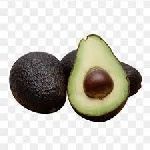

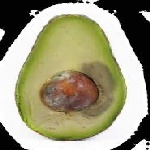

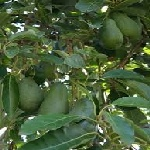

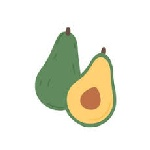

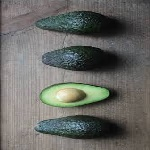

orange


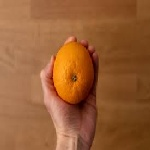

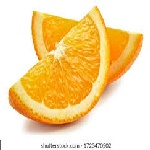

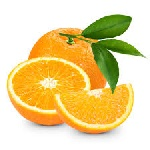

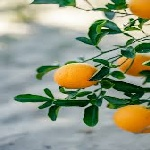

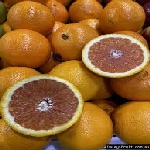

banana


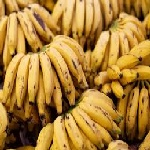

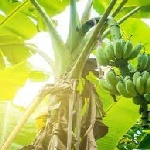

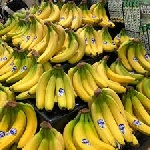

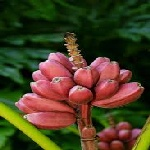

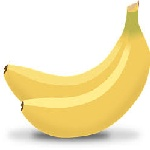

kiwi


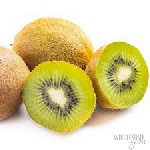

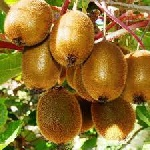

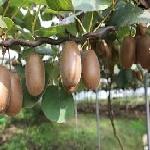

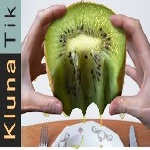

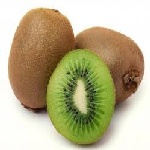

mango


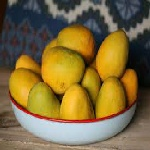

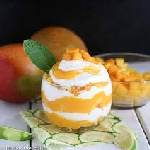

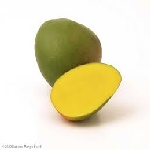

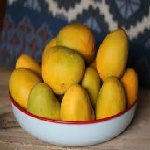

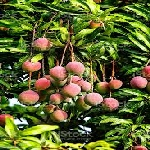

pinenapple


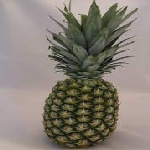

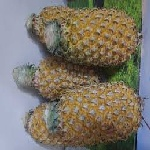

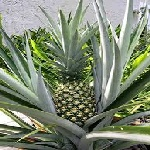

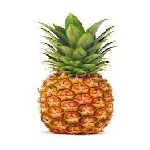

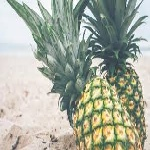

apple


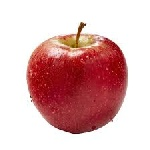

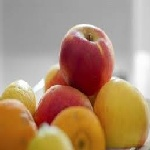

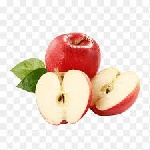

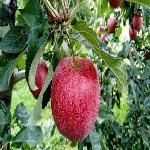

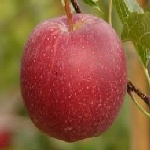

watermelon


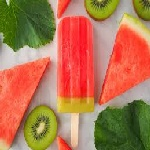

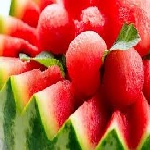

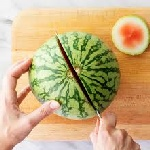

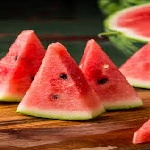

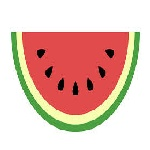

stawberries


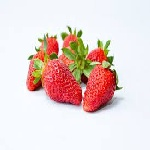

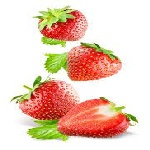

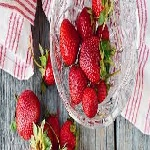

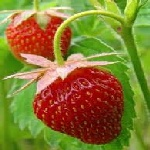

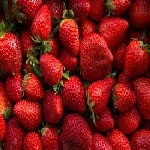

cherry


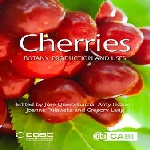

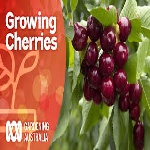

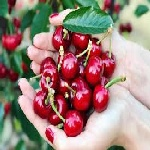

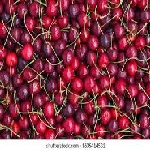

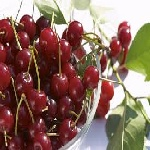

In [30]:
# display the resized images, 5 for each category. I have shared a sample below.
img_path2= '/content/test'
for file in os.listdir(img_path2):
  print(file)
  path = os.path.join(img_path, file)
  flag = display_images(file, path)
  if file == True:
    break


In [51]:
# define your model here
categories = ['apple', 'avocado','banana','cherry','kiwi','mango','orange','pinenapple','stawberries','watermelon']
img_size =150
def define_model(data_directory):
    data = [] 
    for label in categories: 
        path = os.path.join(data_directory, label)
        class_num = categories.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] 
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [52]:
from ipykernel import kernelapp as app
train = define_model('/content/train')
val = define_model('/content/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [54]:
x_train = []
y_train = []
x_val = []
y_val = []
for feature, label in train:
  x_train.append(feature)
  y_train.append(label)
for feature, label in val:
  x_val.append(feature)
  y_val.append(label)
# Normalizing
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)
x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [55]:
datagenerator = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range = 30, 
        zoom_range = 0.2,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        vertical_flip=False)  
datagenerator.fit(x_train)

In [56]:
# print your model summary showing trainable parameters
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(150,150,3)))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 32)      

In [57]:
opti_mizer = Adam(learning_rate=0.001)
model.compile(optimizer = opti_mizer , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [58]:
# train your model to atleast 100 epoches. You may choose your own loss, optimizer, scheduler, batchsize etc.
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


72/72 [==============================] - 3s 31ms/step - loss: 1.9304 - accuracy: 0.2565 - val_loss: 1.6517 - val_accuracy: 0.3493
Epoch 2/10
72/72 [==============================] - 2s 25ms/step - loss: 1.5496 - accuracy: 0.3943 - val_loss: 1.4773 - val_accuracy: 0.4576
Epoch 3/10
72/72 [==============================] - 2s 25ms/step - loss: 1.3688 - accuracy: 0.4935 - val_loss: 1.5457 - val_accuracy: 0.4556
Epoch 4/10
72/72 [==============================] - 2s 25ms/step - loss: 1.2415 - accuracy: 0.5391 - val_loss: 1.3544 - val_accuracy: 0.5024
Epoch 5/10
72/72 [==============================] - 2s 25ms/step - loss: 1.1459 - accuracy: 0.5748 - val_loss: 1.3326 - val_accuracy: 0.5376
Epoch 6/10
72/72 [==============================] - 2s 25ms/step - loss: 1.0388 - accuracy: 0.6148 - val_loss: 1.3757 - val_accuracy: 0.5454
Epoch 7/10
72/72 [==============================] - 2s 30ms/step - loss: 0.9532 - accuracy: 0.6496 - val_loss: 1.3263 - val_accuracy: 0.5493
Epoch 8/10
72/72 [======

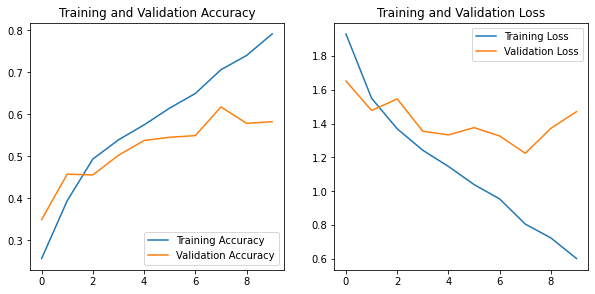

In [65]:
# print model testloss and test accuracy here
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs_ = range(10)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_, accuracy, label='Training Accuracy')
plt.plot(epochs_, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_, loss, label='Training Loss')
plt.plot(epochs_, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
model.save('project_model_adam.h5')

In [61]:
model = load_model('project_model_adam.h5')

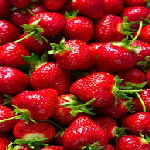

In [62]:
# predict labels for all the images from the predict set and display the image along with the name predicted by the model.
import numpy as np 
from keras.preprocessing import image
test_samp1 =tf.keras.utils.load_img('/content/predict/f7.jpeg',target_size =(150,150))
test_samp1

In [63]:
from tensorflow.keras.utils import img_to_array


In [64]:
test_image =img_to_array(test_samp1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("apple") 
elif result[0][1]==1: 
    print('avocado') 
elif result[0][2]==1: 
    print('banana') 
elif result[0][3]==1: 
    print('cherry') 
elif result[0][4]==1: 
    print('kiwi') 
elif result[0][5]==1: 
    print('mango') 
elif result[0][6]==1: 
    print('orange') 
elif result[0][7]==1: 
    print('pinenpple') 
elif result[0][8]==1: 
    print('stawberries') 
elif result[0][9]==1: 
    print('watermelon') 
else: 
    print('Error')

1/1 [==============================] - 0s 72ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
stawberries


**Part2:**

training the model with a learning rate scheduler. 

change the optimizer. 

For these additional experiments you have to only report the train and test accuracy.


In [67]:
from tensorflow.keras.optimizers import SGD

In [71]:
opti_mizer2 = SGD(learning_rate=0.001)
model.compile(optimizer = opti_mizer2 , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [72]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10
72/72 [==============================] - 3s 30ms/step - loss: 0.3115 - accuracy: 0.8900 - val_loss: 1.5413 - val_accuracy: 0.6312
Epoch 2/10
72/72 [==============================] - 2s 25ms/step - loss: 0.2865 - accuracy: 0.9017 - val_loss: 1.5649 - val_accuracy: 0.6254
Epoch 3/10
72/72 [==============================] - 2s 25ms/step - loss: 0.2945 - accuracy: 0.9009 - val_loss: 1.5291 - val_accuracy: 0.6244
Epoch 4/10
72/72 [==============================] - 2s 25ms/step - loss: 0.2819 - accuracy: 0.9113 - val_loss: 1.5533 - val_accuracy: 0.6263
Epoch 5/10
72/72 [==============================] - 2s 30ms/step - loss: 0.2810 - accuracy: 0.9052 - val_loss: 1.5477 - val_accuracy: 0.6234
Epoch 6/10
72/72 [==============================] - 2s 26ms/step - loss: 0.2820 - accuracy: 0.9070 - val_loss: 1.5501 - val_accuracy: 0.6273
Epoch 7/10
72/72 [==============================] - 2s 25ms/step - loss: 0.2830 - accuracy: 0.9057 - val_loss: 1.5792 - val_accuracy: 0.6302
Epoch 8/10
72

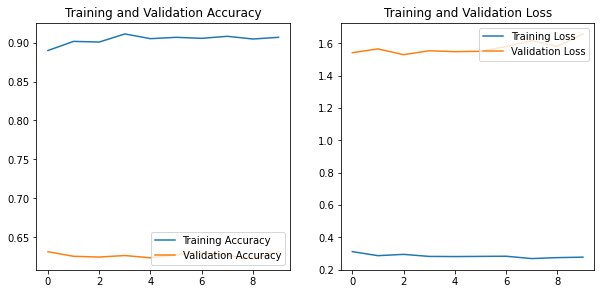

In [73]:
# print model testloss and test accuracy here
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs_ = range(10)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_, accuracy, label='Training Accuracy')
plt.plot(epochs_, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_, loss, label='Training Loss')
plt.plot(epochs_, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()